# Bagging
- Bootstrap aggregating
    - Resample training data set with replacement and recalculate predictions
    - Average the predictions together
- Averaging multiple complex models have similar bias and reduced variance
- Most useful for non linear models

# Random Forests
- Bootstrap samples
- At each split, bootstrap variables
- Grow multiple trees
- Accurate but slow and can overfit

## Example
- Using Iris datset

In [2]:
library(caret)
library(ggplot2)

data(iris)


inTrain <- createDataPartition(y = iris$Species, p = 0.7, list = FALSE)
training <- iris[inTrain,]
testing <- iris[-inTrain,]

Loading required package: lattice


In [3]:
# Build a Random Forests Model
modelFit <- train(Species ~ ., data = training, method = "rf", prox = TRUE)
modelFit

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



Random Forest 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 105, 105, 105, 105, 105, 105, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9363883  0.9027622
  3     0.9352455  0.9010339
  4     0.9375312  0.9045056

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 4.

In [5]:
# Look at 2nd Tree
getTree(modelFit$finalModel, k = 2)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,3,2.45,1,0
2,0,0,0,0.00,-1,1
3,4,5,3,4.75,1,0
4,6,7,1,4.95,1,0
5,8,9,4,1.75,1,0
6,0,0,0,0.00,-1,3
7,0,0,0,0.00,-1,2
8,10,11,3,5.30,1,0
9,0,0,0,0.00,-1,3
10,0,0,0,0.00,-1,2


In [9]:
# Predict Using the Model
pred <- predict(modelFit, testing)

In [10]:
# Look at Confusion Matrix
confusionMatrix(pred, testing$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
Prevalence                  0.3333          

In [11]:
# Look at the Values Predicted wrong
testing$predRight <- pred == testing$Species
table(pred, testing$Species)

            
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

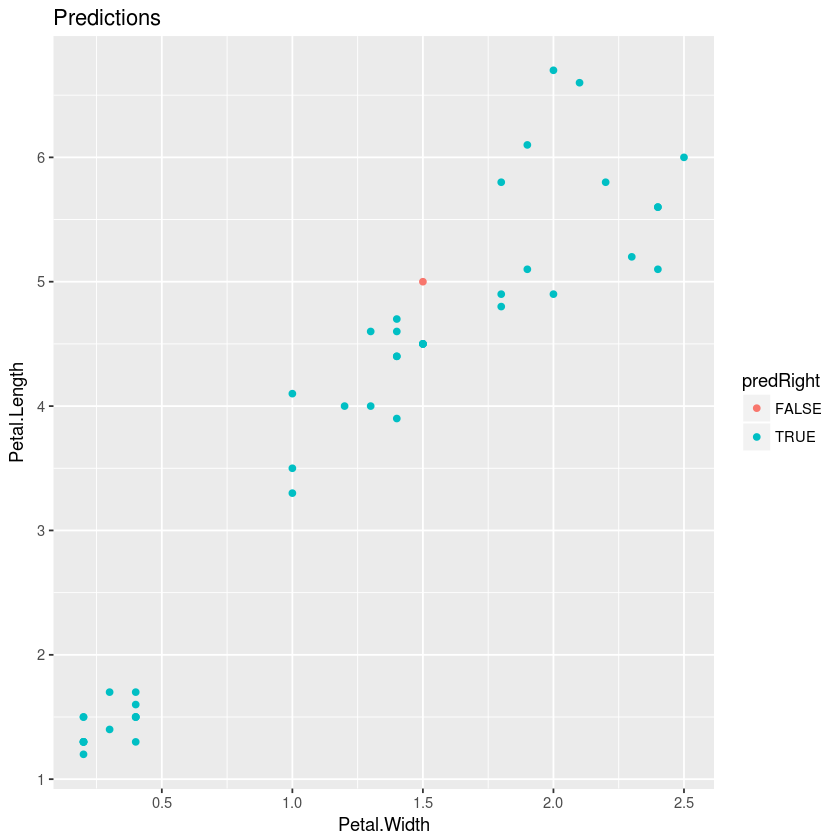

In [12]:
qplot(Petal.Width, Petal.Length, color = predRight, data = testing, main = "Predictions")